## Mastering Machine Learning 2025

### Clase 1: Introducción a redes neuronales en pytorch

- Redes densas
- Redes para regresión
- Funciones de activación y pérdida


Empecemos importando numpy y pandas

In [1]:
import numpy as np
import pandas as pd

Montemos el drive de google para leer archivos almacenados allí

In [34]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [4]:
data_mpg = "/home/erich/dev/mastering_machine_learning/taller_clase_2/Erich/data/auto-mpg.data"

In [5]:
df = pd.read_csv(data_mpg,
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Exploremos las primeras filas del dataframe.

In [6]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

Exploremos el tamaño del df

In [7]:
df.shape

(398, 8)

Identificamos NAs en los datos

In [8]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(392, 8)

In [11]:
df=df.reset_index(drop=True)

In [12]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


Separamos los datos en entrenamiento y prueba

In [13]:
from sklearn import model_selection

In [14]:
train, test = model_selection.train_test_split(df, train_size=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
338,30.0,4,135.0,84.0,2385.0,12.9,81,1
328,33.8,4,97.0,67.0,2145.0,18.0,80,3
352,32.9,4,119.0,100.0,2615.0,14.8,81,3
372,38.0,4,105.0,63.0,2125.0,14.7,82,1
304,28.8,6,173.0,115.0,2595.0,11.3,79,1


In [15]:
train.shape

(313, 8)

In [16]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
18,27.0,4,97.0,88.0,2130.0,14.5,70,3
21,24.0,4,107.0,90.0,2430.0,14.5,70,2


In [17]:
print(train.shape)
print(test.shape)

(313, 8)
(79, 8)


Realicemos una exploración descriptiva de los datos, calculando inicialmente estadísticas de cada variable continua

In [18]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,23.749521,5.424920,191.940895,104.501597,2955.140575,15.545048,76.031949,1.597444
std,7.966002,1.717636,104.522896,38.748956,845.347391,2.765223,3.750077,0.822905
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.000000,2226.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,141.000000,94.000000,2720.000000,15.500000,76.000000,1.000000
75%,29.500000,8.000000,302.000000,130.000000,3563.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


Exploremos relaciones bivariadas con pairplot de seaborn

In [19]:
import seaborn as sns

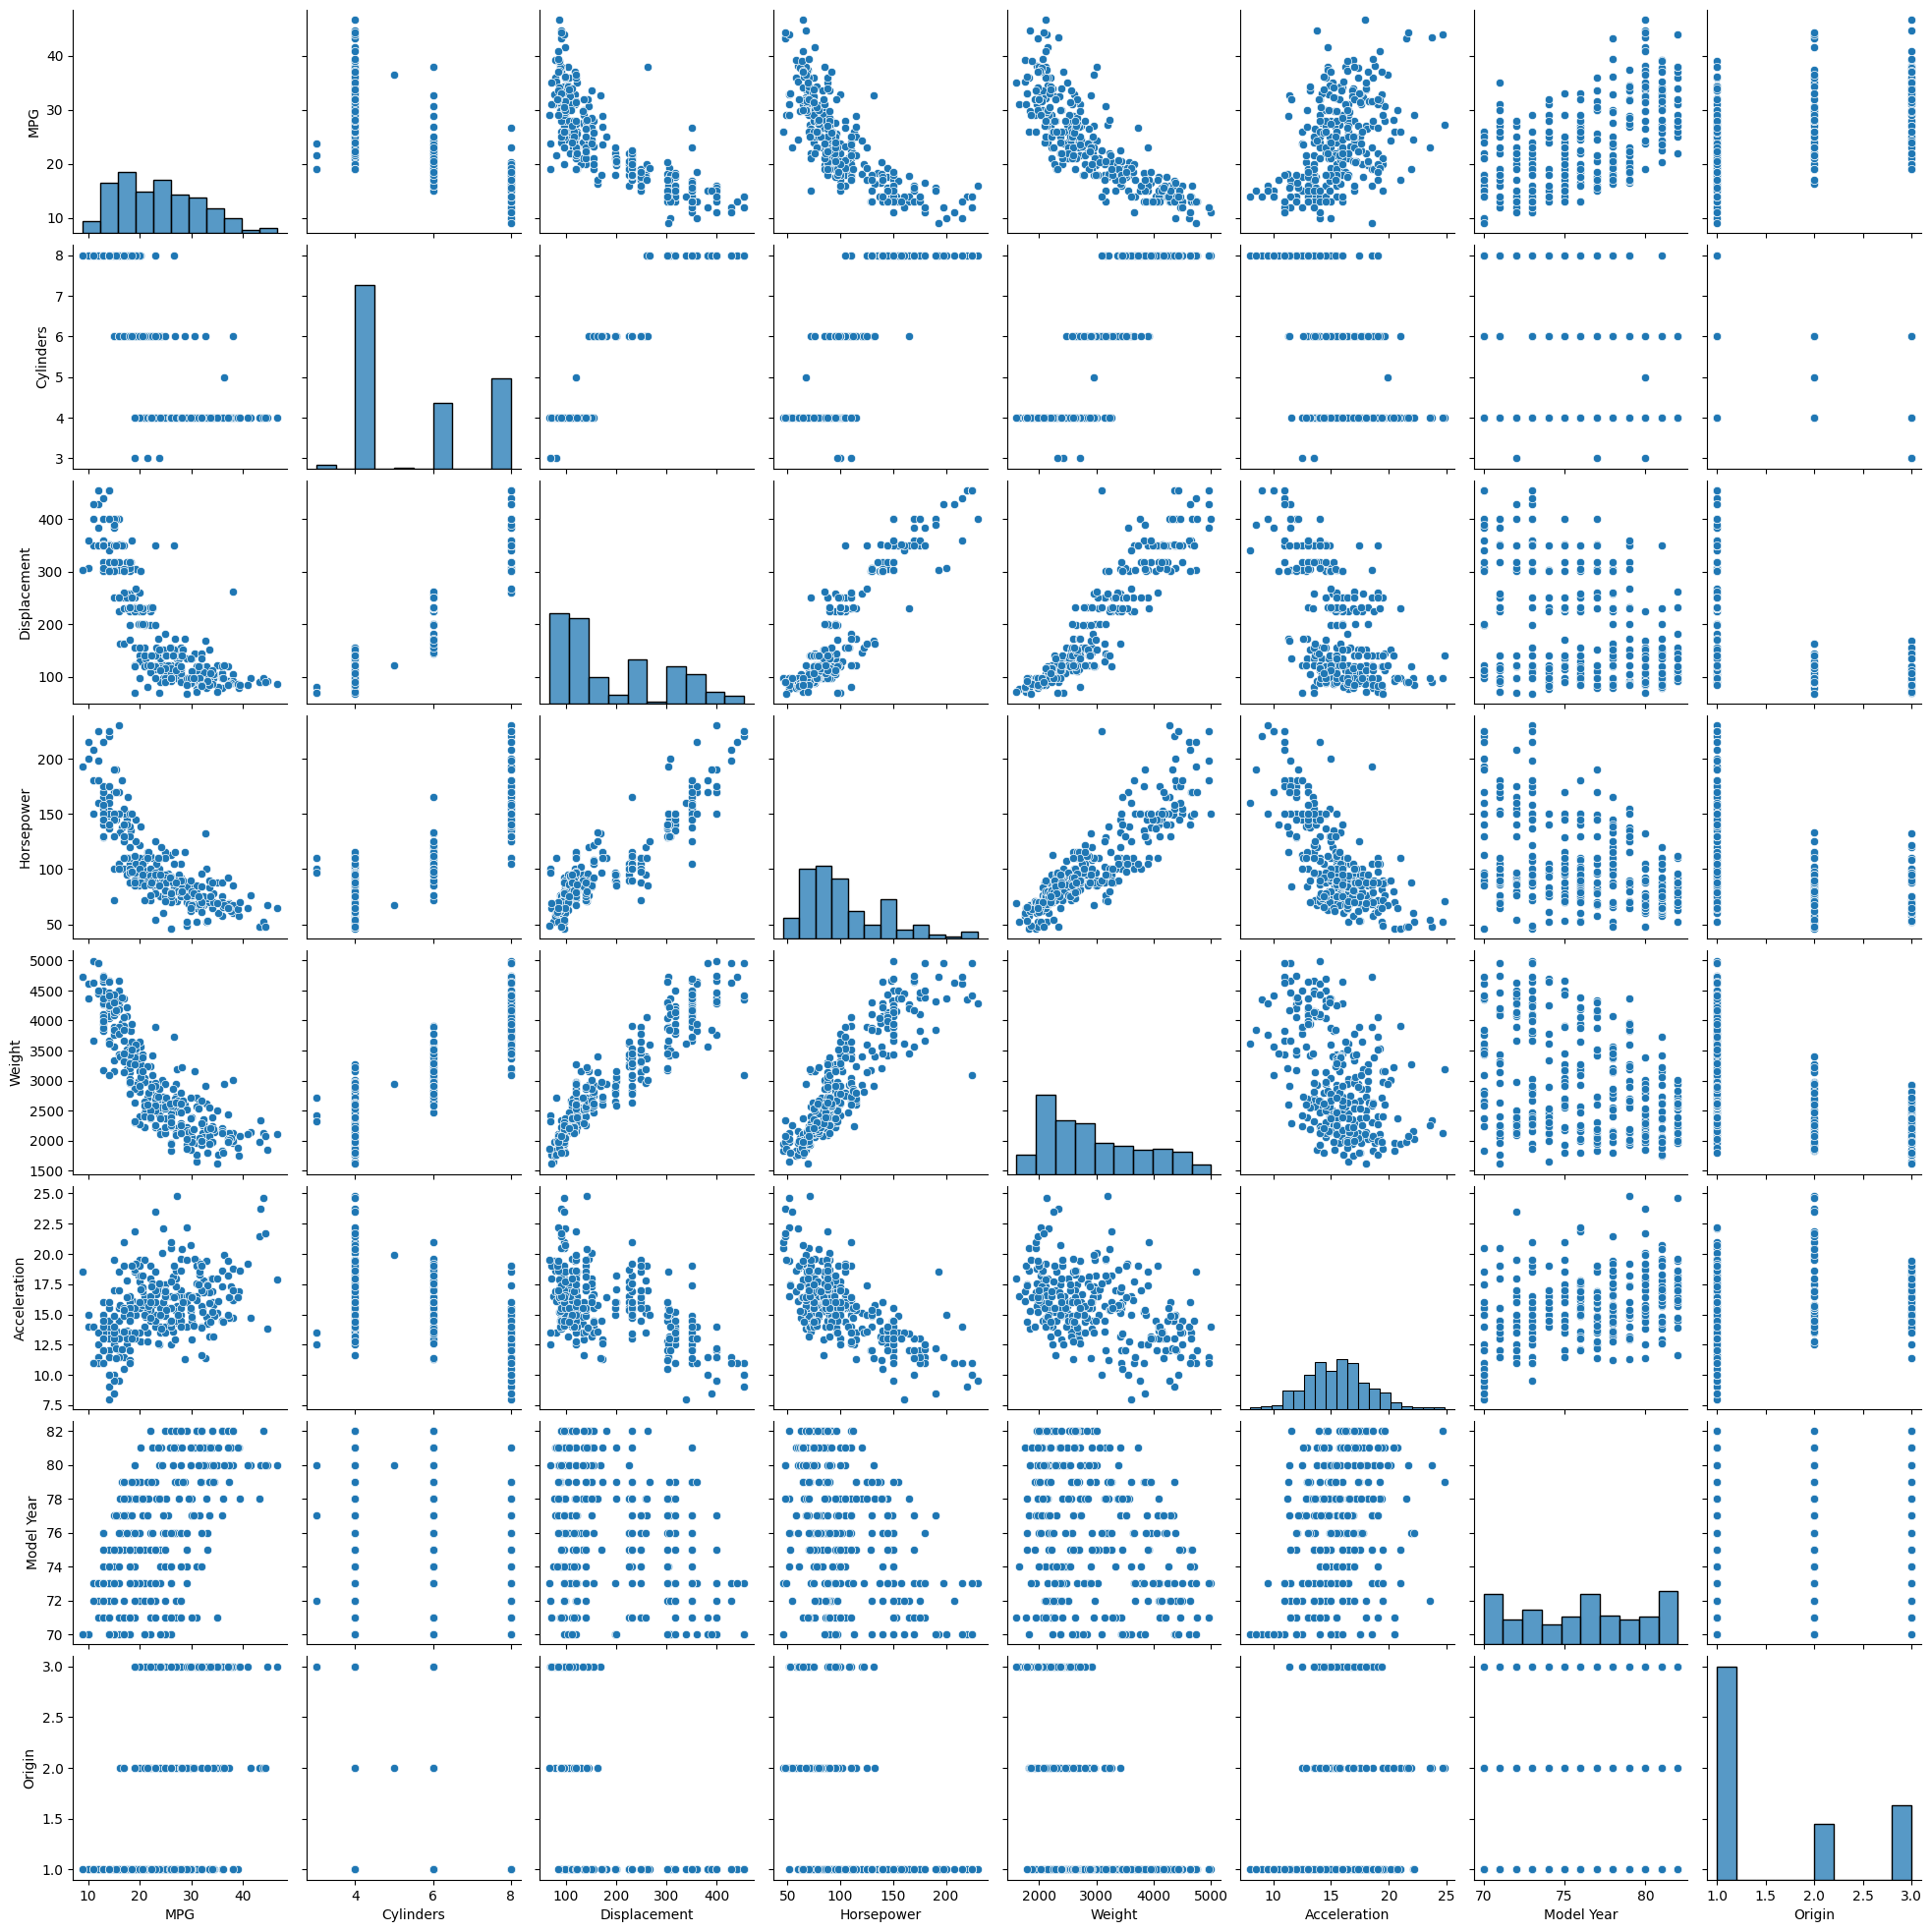

In [20]:
sns.pairplot(train)

Calculemos la matriz de correlacion

In [21]:
train.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.772426,-0.802326,-0.785584,-0.826179,0.457481,0.598676,0.579119
Cylinders,-0.772426,1.000000,0.952178,0.849493,0.899086,-0.533705,-0.362869,-0.565673
Displacement,-0.802326,0.952178,1.000000,0.903217,0.931881,-0.571698,-0.384420,-0.610077
Horsepower,-0.785584,0.849493,0.903217,1.000000,0.874688,-0.697374,-0.416832,-0.466475
Weight,-0.826179,0.899086,0.931881,0.874688,1.000000,-0.449165,-0.321738,-0.580604
Acceleration,0.457481,-0.533705,-0.571698,-0.697374,-0.449165,1.000000,0.306935,0.230824
Model Year,0.598676,-0.362869,-0.384420,-0.416832,-0.321738,0.306935,1.000000,0.221252
Origin,0.579119,-0.565673,-0.610077,-0.466475,-0.580604,0.230824,0.221252,1.000000


<Axes: >

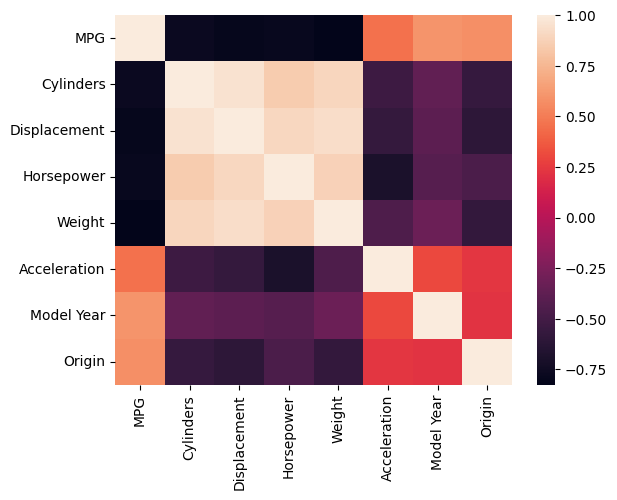

In [22]:
sns.heatmap(train.corr())

In [23]:
numeric_cols = ['Cylinders', 'Displacement','Horsepower','Weight','Acceleration', 'Model Year']

In [24]:
train_norm , test_norm = train.copy(), test.copy()

for col in numeric_cols:
  mean = train[col].mean()
  std = train[col].std()

  train_norm[col] = ( train_norm[col] - mean) /std
  test_norm[col] = (test_norm[col] - mean) /std

In [25]:
train_norm.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
338,30.0,-0.829582,-0.544770,-0.529088,-0.674445,-0.956541,1.324786,1
328,33.8,-0.829582,-0.908326,-0.967809,-0.958352,0.887795,1.058125,3
352,32.9,-0.829582,-0.697846,-0.116173,-0.402368,-0.269435,1.324786,3
372,38.0,-0.829582,-0.831788,-1.071038,-0.982011,-0.305598,1.591448,1
304,28.8,0.334809,-0.181213,0.270934,-0.426027,-1.535156,0.791464,1


Codificación one-hot para Origin y generación de datos de entrada x_train y x_test, en formato tensor

In [26]:
import torch
from torch.nn.functional import one_hot

# determinar número de categorías
n_categories = len(set(train_norm['Origin']))

# codificación one hot para Origin - train set
origin_encoded = one_hot(torch.from_numpy(train_norm['Origin'].values % n_categories))
x_train_numeric = torch.tensor(train_norm[numeric_cols].values)
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()

# codificación one hot para Origin - test set
origin_encoded = one_hot(torch.from_numpy(test_norm['Origin'].values % n_categories))
x_test_numeric = torch.tensor(test_norm[numeric_cols].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

Datos de salida en formato tensor

In [27]:
y_train = torch.tensor(train_norm['MPG'].values).float()
y_test = torch.tensor(test_norm['MPG'].values).float()

Crear un Dataset y un DataLoader para el entrenamiento de los modelos

In [28]:
from torch.utils.data import Dataset, TensorDataset, DataLoader

train_ds = TensorDataset(x_train, y_train)
batch_size = 16
torch.manual_seed(42)

train_dl = DataLoader(train_ds, batch_size, shuffle = True)

Crear un primer modelo con dos capas ocultas de 8 y 4 neuronas (función de activación ReLU) y una salida lineal (regresión)

In [29]:
import torch.nn as nn

hidden_units = [8, 4]
input_size = x_train.shape[1]

all_layers = []
for hidden_units_layer in hidden_units:
  layer = nn.Linear(input_size, hidden_units_layer)
  all_layers.append(layer)
  all_layers.append(nn.ReLU())
  input_size = hidden_units_layer

all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

Entrenar el modelo usando descenso del gradiente estocástico y función de pérdida MSE (mean squared error)

In [30]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

torch.manual_seed(1)
num_epochs = 200
log_epochs = 20

for epoch in range(num_epochs):
  loss_hist_train = 0
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)[:,0]
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist_train += loss.item()

  if epoch % log_epochs == 0:
    print(f'Epoch {epoch} Loss {loss_hist_train/len(train_dl):.4f}')

/home/erich/dev/mastering_machine_learning/taller_clase_2/.venv/lib/python3.10/site-packages/torch/autograd/graph.py:824: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 0 Loss 606.3316
Epoch 20 Loss 8.2657
Epoch 40 Loss 8.2380
Epoch 60 Loss 7.8241
Epoch 80 Loss 7.4453
Epoch 100 Loss 7.1684
Epoch 120 Loss 7.2043
Epoch 140 Loss 6.9791
Epoch 160 Loss 7.0780
Epoch 180 Loss 6.9038


Predicción de un nuevo dato de prueba y evaluación con MSE y MAE (mean absolute error)

In [31]:
with torch.no_grad():
  pred = model(x_test.float())[:,0]
  loss = loss_fn(pred, y_test)
  print(f'Test MSE: {loss.item():.4f}')
  print(f'Test MAE: {nn.L1Loss()(pred,y_test).item():.4f}')

Test MSE: 5.1344
Test MAE: 1.6644


# Parte 1: Regresión con redes neuronales

Importación de librerías y carga de datos

In [32]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.nn.functional import one_hot

In [34]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isna().sum())

# Eliminar filas con valores faltantes
df.dropna(inplace=True)
df = df.reset_index(drop=True)
print(f"\nForma después de eliminar NAs: {df.shape}")

Valores faltantes por columna:
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Forma después de eliminar NAs: (392, 8)


In [35]:
# Dividir datos en entrenamiento y prueba
train, test = model_selection.train_test_split(df, train_size=0.8, random_state=100)
print(f"Datos de entrenamiento: {train.shape}")
print(f"Datos de prueba: {test.shape}")

Datos de entrenamiento: (313, 8)
Datos de prueba: (79, 8)


## 1. Modelo con una sola variable predictora y capa lineal

Utilizaremos solo la variable Weight como predictor

In [36]:
# Preparar datos para modelo univariado (solo Weight)
def prepare_single_variable_data(train_df, test_df, variable='Weight'):
    """
    Prepara los datos para un modelo con una sola variable predictora
    """
    # Normalizar la variable predictora
    mean_var = train_df[variable].mean()
    std_var = train_df[variable].std()
    
    # Normalizar variable de entrada
    x_train_single = torch.tensor((train_df[variable].values - mean_var) / std_var).float().reshape(-1, 1)
    x_test_single = torch.tensor((test_df[variable].values - mean_var) / std_var).float().reshape(-1, 1)
    
    # Variable objetivo (sin normalizar para interpretabilidad)
    y_train_single = torch.tensor(train_df['MPG'].values).float()
    y_test_single = torch.tensor(test_df['MPG'].values).float()
    
    return x_train_single, x_test_single, y_train_single, y_test_single

x_train_single, x_test_single, y_train_single, y_test_single = prepare_single_variable_data(train, test, 'Weight')

print(f"Forma de X_train: {x_train_single.shape}")
print(f"Forma de y_train: {y_train_single.shape}")

Forma de X_train: torch.Size([313, 1])
Forma de y_train: torch.Size([313])


In [37]:
# Modelo base: una sola capa lineal
class LinearModel(nn.Module):
    def __init__(self, input_size=1):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        return self.linear(x)

# Crear modelo base
model_base = LinearModel(input_size=1)
print("Modelo base:")
print(model_base)

Modelo base:
LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [38]:
# Función de entrenamiento
def train_model(model, x_train, y_train, epochs=1000, lr=0.01, batch_size=16):
    """
    Entrena un modelo y retorna el historial de pérdidas
    """
    # Dataset y DataLoader
    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    
    # Configurar optimizador y función de pérdida
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    
    # Historial de pérdidas
    loss_history = []
    
    # Entrenamiento
    torch.manual_seed(42)
    for epoch in range(epochs):
        epoch_loss = 0
        for x_batch, y_batch in train_dl:
            # Forward pass
            pred = model(x_batch).squeeze()
            loss = loss_fn(pred, y_batch)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(train_dl)
        loss_history.append(avg_loss)
        
        if (epoch + 1) % 200 == 0:
            print(f'Época {epoch+1}/{epochs}, Pérdida: {avg_loss:.4f}')
    
    return loss_history

# Entrenar modelo base
print("Entrenando modelo base (capa lineal)...")
loss_history_base = train_model(model_base, x_train_single, y_train_single, epochs=1000, lr=0.01)

Entrenando modelo base (capa lineal)...
Época 200/1000, Pérdida: 20.0252
Época 400/1000, Pérdida: 19.9613
Época 600/1000, Pérdida: 20.0593
Época 800/1000, Pérdida: 20.3789
Época 1000/1000, Pérdida: 19.9474


## 2. Evaluación del modelo base


In [39]:
# Función de evaluación
def evaluate_model(model, x_test, y_test):
    """
    Evalúa un modelo usando MSE y MAE
    """
    model.eval()
    with torch.no_grad():
        pred = model(x_test).squeeze()
        mse = nn.MSELoss()(pred, y_test).item()
        mae = nn.L1Loss()(pred, y_test).item()
    return mse, mae, pred

# Evaluar modelo base
mse_base, mae_base, pred_base = evaluate_model(model_base, x_test_single, y_test_single)
print(f"Modelo Base - MSE: {mse_base:.4f}, MAE: {mae_base:.4f}")

Modelo Base - MSE: 13.2565, MAE: 2.8184


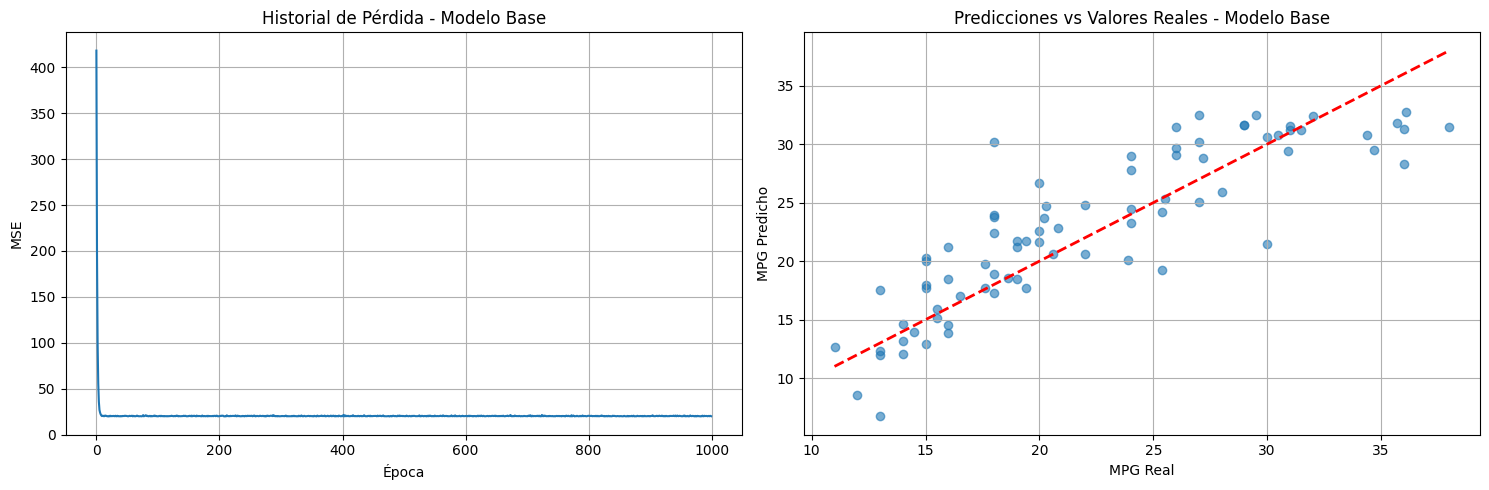

In [40]:
# Graficar historial de pérdida y resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Historial de pérdida
axes[0].plot(loss_history_base)
axes[0].set_title('Historial de Pérdida - Modelo Base')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('MSE')
axes[0].grid(True)

# Predicciones vs valores reales
axes[1].scatter(y_test_single.numpy(), pred_base.numpy(), alpha=0.6)
axes[1].plot([y_test_single.min(), y_test_single.max()], 
             [y_test_single.min(), y_test_single.max()], 'r--', lw=2)
axes[1].set_xlabel('MPG Real')
axes[1].set_ylabel('MPG Predicho')
axes[1].set_title('Predicciones vs Valores Reales - Modelo Base')
axes[1].grid(True)

plt.tight_layout()
plt.show()

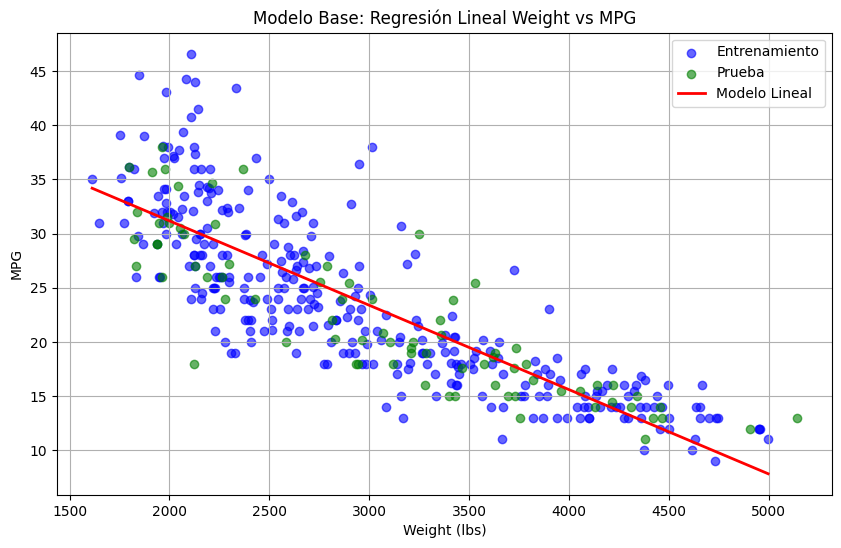

In [41]:
# Visualizar la función aprendida
plt.figure(figsize=(10, 6))

# Datos de entrenamiento
weight_train_orig = train['Weight'].values
mpg_train = train['MPG'].values

# Datos de prueba
weight_test_orig = test['Weight'].values
mpg_test = test['MPG'].values

# Crear rango para visualizar la función
weight_range = np.linspace(weight_train_orig.min(), weight_train_orig.max(), 100)
weight_range_norm = (weight_range - train['Weight'].mean()) / train['Weight'].std()
weight_range_tensor = torch.tensor(weight_range_norm).float().reshape(-1, 1)

# Predicciones para el rango
with torch.no_grad():
    pred_range = model_base(weight_range_tensor).squeeze().numpy()

# Graficar
plt.scatter(weight_train_orig, mpg_train, alpha=0.6, label='Entrenamiento', color='blue')
plt.scatter(weight_test_orig, mpg_test, alpha=0.6, label='Prueba', color='green')
plt.plot(weight_range, pred_range, 'r-', linewidth=2, label='Modelo Lineal')
plt.xlabel('Weight (lbs)')
plt.ylabel('MPG')
plt.title('Modelo Base: Regresión Lineal Weight vs MPG')
plt.legend()
plt.grid(True)
plt.show()

Comentarios sobre el modelo base:

El modelo base utiliza una regresión lineal simple con la variable Weight
La relación lineal captura la tendencia negativa entre peso y eficiencia de combustible
El MSE y MAE esta un poco grande, de igual forma se tiene que comparara para decidir cual modelo 

## 3. Modelo con función de activación no lineal


In [42]:
# Modelo con activación no lineal
class NonLinearModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=10):
        super(NonLinearModel, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.output = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

# Crear y entrenar modelo no lineal
model_nonlinear = NonLinearModel(input_size=1, hidden_size=10)
print("Modelo no lineal:")
print(model_nonlinear)

print("\nEntrenando modelo no lineal...")
loss_history_nonlinear = train_model(model_nonlinear, x_train_single, y_train_single, epochs=1000, lr=0.01)

Modelo no lineal:
NonLinearModel(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (activation): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)

Entrenando modelo no lineal...
Época 200/1000, Pérdida: 18.4893
Época 400/1000, Pérdida: 18.9170
Época 600/1000, Pérdida: 20.2528
Época 800/1000, Pérdida: 19.2539
Época 1000/1000, Pérdida: 19.5469


In [43]:
# Evaluar modelo no lineal
mse_nonlinear, mae_nonlinear, pred_nonlinear = evaluate_model(model_nonlinear, x_test_single, y_test_single)
print(f"Modelo No Lineal - MSE: {mse_nonlinear:.4f}, MAE: {mae_nonlinear:.4f}")

# Comparación con modelo base
print(f"\nComparación:")
print(f"Modelo Base     - MSE: {mse_base:.4f}, MAE: {mae_base:.4f}")
print(f"Modelo No Lineal - MSE: {mse_nonlinear:.4f}, MAE: {mae_nonlinear:.4f}")
print(f"Mejora en MSE: {((mse_base - mse_nonlinear) / mse_base * 100):.2f}%")

Modelo No Lineal - MSE: 11.7856, MAE: 2.5160

Comparación:
Modelo Base     - MSE: 13.2565, MAE: 2.8184
Modelo No Lineal - MSE: 11.7856, MAE: 2.5160
Mejora en MSE: 11.10%


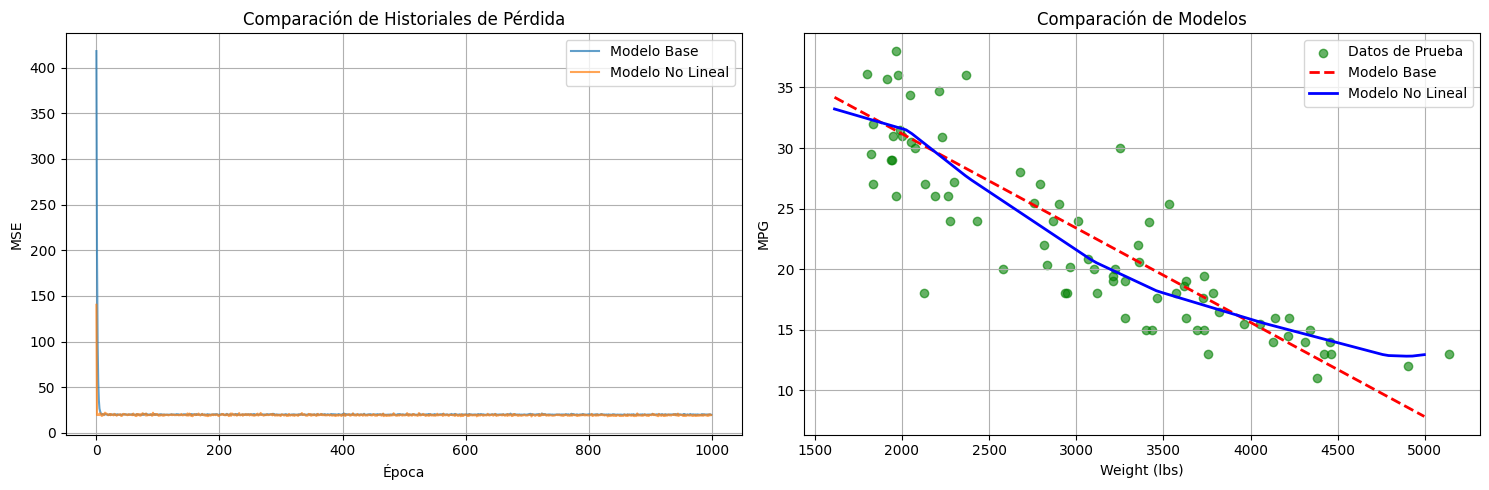

In [44]:
# Visualizar comparación
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Historial de pérdidas
axes[0].plot(loss_history_base, label='Modelo Base', alpha=0.7)
axes[0].plot(loss_history_nonlinear, label='Modelo No Lineal', alpha=0.7)
axes[0].set_title('Comparación de Historiales de Pérdida')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('MSE')
axes[0].legend()
axes[0].grid(True)

# Funciones aprendidas
weight_range = np.linspace(weight_train_orig.min(), weight_train_orig.max(), 100)
weight_range_norm = (weight_range - train['Weight'].mean()) / train['Weight'].std()
weight_range_tensor = torch.tensor(weight_range_norm).float().reshape(-1, 1)

with torch.no_grad():
    pred_range_base = model_base(weight_range_tensor).squeeze().numpy()
    pred_range_nonlinear = model_nonlinear(weight_range_tensor).squeeze().numpy()

axes[1].scatter(weight_test_orig, mpg_test, alpha=0.6, label='Datos de Prueba', color='green')
axes[1].plot(weight_range, pred_range_base, 'r--', linewidth=2, label='Modelo Base')
axes[1].plot(weight_range, pred_range_nonlinear, 'b-', linewidth=2, label='Modelo No Lineal')
axes[1].set_xlabel('Weight (lbs)')
axes[1].set_ylabel('MPG')
axes[1].set_title('Comparación de Modelos')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Comentarios sobre el modelo no lineal:

El modelo usa la funcion de activación ReLU para capturar relaciones no lineales en los datos

El modelo mejora la prediccion con respecto al modelo lineal.

## 4. Modelo con múltiples capas

In [45]:
# Modelo con múltiples capas
class DeepModel(nn.Module):
    def __init__(self, input_size=1, hidden_sizes=[20, 10, 5]):
        super(DeepModel, self).__init__()
        layers = []
        
        # Primera capa
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        
        # Capas ocultas
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
        
        # Capa de salida
        layers.append(nn.Linear(hidden_sizes[-1], 1))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Crear y entrenar modelo profundo
model_deep = DeepModel(input_size=1, hidden_sizes=[20, 10, 5])
print("Modelo profundo:")
print(model_deep)

print("\nEntrenando modelo profundo...")
loss_history_deep = train_model(model_deep, x_train_single, y_train_single, epochs=1500, lr=0.005)

Modelo profundo:
DeepModel(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=1, bias=True)
  )
)

Entrenando modelo profundo...
Época 200/1500, Pérdida: 17.5660
Época 400/1500, Pérdida: 18.2804
Época 600/1500, Pérdida: 19.3893
Época 800/1500, Pérdida: 18.6350
Época 1000/1500, Pérdida: 18.6312
Época 1200/1500, Pérdida: 18.5698
Época 1400/1500, Pérdida: 17.9689


In [46]:
# Evaluar modelo profundo
mse_deep, mae_deep, pred_deep = evaluate_model(model_deep, x_test_single, y_test_single)

# Comparación de todos los modelos
print("Comparación de todos los modelos:")
print(f"Modelo Base       - MSE: {mse_base:.4f}, MAE: {mae_base:.4f}")
print(f"Modelo No Lineal  - MSE: {mse_nonlinear:.4f}, MAE: {mae_nonlinear:.4f}")
print(f"Modelo Profundo   - MSE: {mse_deep:.4f}, MAE: {mae_deep:.4f}")

Comparación de todos los modelos:
Modelo Base       - MSE: 13.2565, MAE: 2.8184
Modelo No Lineal  - MSE: 11.7856, MAE: 2.5160
Modelo Profundo   - MSE: 15.8461, MAE: 2.8966


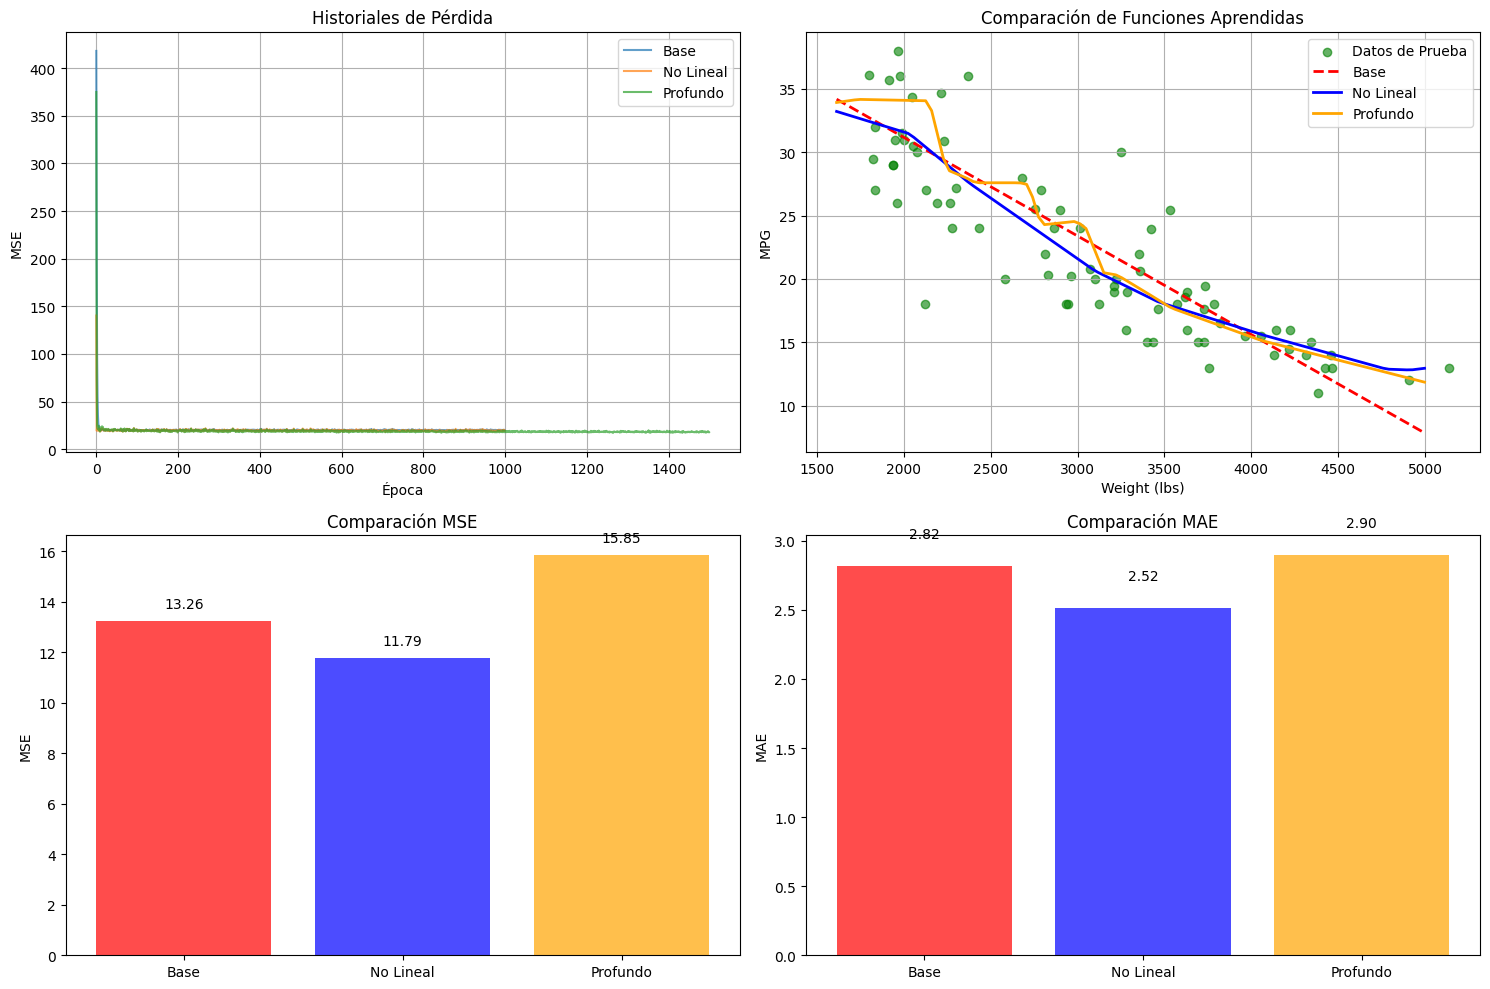

In [47]:
# Visualización comparativa final
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Historiales de pérdida
axes[0,0].plot(loss_history_base, label='Base', alpha=0.7)
axes[0,0].plot(loss_history_nonlinear, label='No Lineal', alpha=0.7)
axes[0,0].plot(loss_history_deep, label='Profundo', alpha=0.7)
axes[0,0].set_title('Historiales de Pérdida')
axes[0,0].set_xlabel('Época')
axes[0,0].set_ylabel('MSE')
axes[0,0].legend()
axes[0,0].grid(True)

# Funciones aprendidas
with torch.no_grad():
    pred_range_deep = model_deep(weight_range_tensor).squeeze().numpy()

axes[0,1].scatter(weight_test_orig, mpg_test, alpha=0.6, label='Datos de Prueba', color='green')
axes[0,1].plot(weight_range, pred_range_base, 'r--', linewidth=2, label='Base')
axes[0,1].plot(weight_range, pred_range_nonlinear, 'b-', linewidth=2, label='No Lineal')
axes[0,1].plot(weight_range, pred_range_deep, 'orange', linewidth=2, label='Profundo')
axes[0,1].set_xlabel('Weight (lbs)')
axes[0,1].set_ylabel('MPG')
axes[0,1].set_title('Comparación de Funciones Aprendidas')
axes[0,1].legend()
axes[0,1].grid(True)

# Métricas de comparación
models = ['Base', 'No Lineal', 'Profundo']
mse_values = [mse_base, mse_nonlinear, mse_deep]
mae_values = [mae_base, mae_nonlinear, mae_deep]

axes[1,0].bar(models, mse_values, alpha=0.7, color=['red', 'blue', 'orange'])
axes[1,0].set_title('Comparación MSE')
axes[1,0].set_ylabel('MSE')
for i, v in enumerate(mse_values):
    axes[1,0].text(i, v + 0.5, f'{v:.2f}', ha='center')

axes[1,1].bar(models, mae_values, alpha=0.7, color=['red', 'blue', 'orange'])
axes[1,1].set_title('Comparación MAE')
axes[1,1].set_ylabel('MAE')
for i, v in enumerate(mae_values):
    axes[1,1].text(i, v + 0.2, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

Comentarios sobre modelos con múltiples capas:

Se realizo con tres capas de 20 10 5 neuranas respectivamnete.

